In [1]:
import os
import openai
from abcli import file
from abcli.modules.cookie import cookie
from openai_cli import NAME, VERSION
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.82.1.


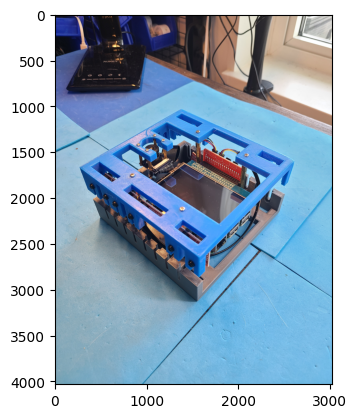

In [2]:
image = file.load_image(os.path.join(os.getenv("HOME",""),"git/blue-bracket/images/portal-34.jpg"))[1]
plt.imshow(image)

In [3]:
openai.api_key = os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [4]:
prompt = """"Write a python function named runme_001 
that inputs an image as a numpy array
and uses opencv vector functions 
to return a darker version of the input image
without running a for loop on the pixels.
"""

In [5]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt,
  max_tokens=200,
)

assert len(response["choices"]) == 1

code = response["choices"][0]["text"]
logger.info(f"code: {code}")

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=6816 request_id=abd340a47c1d893a67c6c2d3c9809af8 response_code=200
code: 
import cv2
import numpy as np

def runme_001(img):
    # Create a new image with lower intensity
    dark_img = cv2.add(img, np.array([-50.0]))

    # re-scale the pixel
    dark_img = cv2.normalize(dark_img, None, 0, 255, cv2.NORM_MINMAX)

    return dark_img


In [6]:
exec(code)

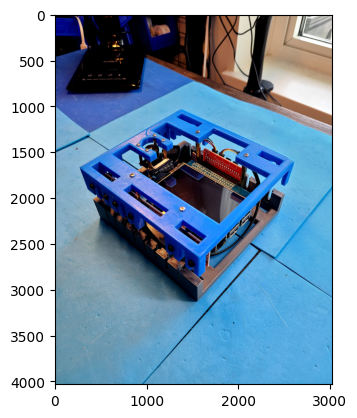

In [7]:
image_output = runme_001(image)
plt.imshow(image_output)

In [8]:
# END